In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
# df = pd.read_csv('../documents/data/previous_data/5555_eventos-edit.csv', index_col=0)
# df = df.drop('time', axis=1)

# # A preliminar analysis show that the base line value is the following:
# baseLine_value = 52.45771253239545
# # it'll not be necessary in a future analysis, cause the conversion parameters will be retrieved from the scope on the acquisition moment.

# waveforms = df - baseLine_value
# waveforms

In [3]:
df = pd.read_csv('../documents/data/1617480254.9367738/5061_events.csv', index_col=0)

C:\.Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,3120,3222,3324,3426,3528,3631,3732,3835,3938,4040,4142,4246,4351,4453,4556,4657,4758,4859,4960) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
waveforms = df[1:]
waveforms

,event_0,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,...,event_5051,event_5052,event_5053,event_5054,event_5055,event_5056,event_5057,event_5058,event_5059,event_5060
0,52.0,52.0,52.0,51.0,54.0,54.0,52.0,50.0,52.0,50.0,...,52.0,50.0,55.0,51.0,53.0,55.0,50.0,53.0,52.0,53.0
1,54.0,52.0,51.0,52.0,52.0,52.0,53.0,54.0,50.0,52.0,...,52.0,51.0,56.0,56.0,53.0,52.0,54.0,51.0,52.0,52.0
2,51.0,52.0,51.0,51.0,49.0,52.0,55.0,54.0,52.0,52.0,...,52.0,51.0,48.0,53.0,55.0,51.0,52.0,52.0,52.0,54.0
3,53.0,54.0,52.0,53.0,52.0,51.0,52.0,51.0,52.0,54.0,...,52.0,51.0,50.0,52.0,55.0,51.0,49.0,53.0,54.0,50.0
4,52.0,52.0,52.0,53.0,54.0,53.0,53.0,54.0,51.0,54.0,...,55.0,54.0,55.0,53.0,53.0,53.0,54.0,52.0,51.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,50.0,54.0,52.0,52.0,52.0,52.0,52.0,53.0,54.0,55.0,...,52.0,53.0,52.0,54.0,54.0,52.0,54.0,51.0,52.0,54.0
2496,53.0,54.0,50.0,52.0,51.0,53.0,54.0,53.0,53.0,53.0,...,53.0,53.0,53.0,52.0,51.0,52.0,54.0,53.0,52.0,51.0
2497,52.0,53.0,52.0,53.0,50.0,53.0,54.0,54.0,52.0,51.0,...,52.0,54.0,51.0,53.0,52.0,52.0,55.0,51.0,54.0,51.0
2498,52.0,53.0,53.0,53.0,53.0,52.0,52.0,53.0,52.0,53.0,...,54.0,53.0,53.0,52.0,52.0,52.0,52.0,50.0,52.0,52.0


In [5]:
# from FindPeaks.peaks import Find_Peaks_Waveforms
# Find_Peaks_Waveforms(waveforms=waveforms, height=0)

In [6]:
def plot_figure(column, limits=''):
    event = waveforms[column]
    x = list(  map( int,event.index.to_list() )  )
    y = event.to_list()
    plt.plot( x,y )
    if limits != '':
        plt.xlim(limits[0], limits[1])
    plt.title(f"{column}")
    plt.show()

In [7]:
problems = []
good = []
best = []
another = []
height = 0
step = 10

for i in range(waveforms.shape[1]):
    events = waveforms[ waveforms.columns[i] ]
    try:
        pk, _ = find_peaks(-1*events, height=height)
    except:
        problems.append(events.name)
    else:
        if len(pk) == 2:
            good.append(events.name)
            if pk[1] - pk[0] >= step:
                best.append(events.name)
        if len(pk) != 2:
            another.append(events.name)

print(f"\nResults\n")
print(f"  problems: {len(problems)}/{waveforms.shape[1]} ({round( 100*len(problems)/waveforms.shape[1] , 2 )})%")
print(f"  good: {len(good)}/{waveforms.shape[1]} ({round( 100*len(good)/waveforms.shape[1] , 2 )})%")
print(f"  best: {len(best)}/{waveforms.shape[1]} ({round( 100*len(best)/waveforms.shape[1] , 2 )})%")
print(f"  another: {len(another)}/{waveforms.shape[1]} ({round( 100*len(another)/waveforms.shape[1] , 2 )})%")



Results

  problems: 19/5061 (0.38)%
  good: 4881/5061 (96.44)%
  best: 1023/5061 (20.21)%
  another: 161/5061 (3.18)%


<h1><center>Perguntas:</center></h1>

Seria melhor manter como necessário para a aquisição que "len(peaks) == 2" e que "peaks_1 - peaks_0 > episolon"?

<h1><center>Resultados</center></h1>

## Good

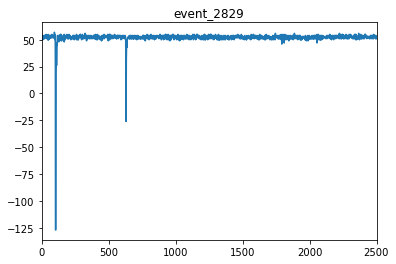

In [8]:
import random
plot_figure(column=random.choice(good), limits=[0,2500])

## Best

In [9]:
waveforms[best]

,event_4,event_6,event_23,event_33,event_37,event_41,event_47,event_48,event_50,event_52,...,event_5019,event_5021,event_5022,event_5023,event_5028,event_5029,event_5039,event_5043,event_5053,event_5060
0,54.0,52.0,51.0,52.0,53.0,54.0,50.0,55.0,52.0,53.0,...,51.0,52.0,52.0,53.0,53.0,51.0,52.0,52.0,55.0,53.0
1,52.0,53.0,51.0,52.0,53.0,53.0,51.0,52.0,54.0,54.0,...,53.0,52.0,53.0,51.0,52.0,52.0,53.0,51.0,56.0,52.0
2,49.0,55.0,53.0,50.0,54.0,53.0,52.0,53.0,53.0,52.0,...,52.0,53.0,53.0,53.0,53.0,52.0,53.0,51.0,48.0,54.0
3,52.0,52.0,53.0,52.0,54.0,53.0,52.0,52.0,53.0,51.0,...,52.0,52.0,54.0,53.0,52.0,52.0,52.0,51.0,50.0,50.0
4,54.0,53.0,51.0,50.0,52.0,55.0,51.0,53.0,50.0,53.0,...,52.0,53.0,52.0,52.0,54.0,55.0,52.0,53.0,55.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,52.0,52.0,53.0,52.0,50.0,53.0,52.0,52.0,53.0,53.0,...,52.0,53.0,50.0,51.0,50.0,51.0,51.0,54.0,52.0,54.0
2496,51.0,54.0,52.0,53.0,52.0,55.0,53.0,55.0,53.0,51.0,...,53.0,54.0,51.0,51.0,55.0,52.0,52.0,53.0,53.0,51.0
2497,50.0,54.0,52.0,56.0,52.0,51.0,54.0,52.0,50.0,52.0,...,53.0,52.0,52.0,51.0,54.0,54.0,51.0,53.0,51.0,51.0
2498,53.0,52.0,50.0,54.0,52.0,51.0,53.0,53.0,53.0,52.0,...,53.0,53.0,55.0,54.0,54.0,53.0,53.0,53.0,53.0,52.0


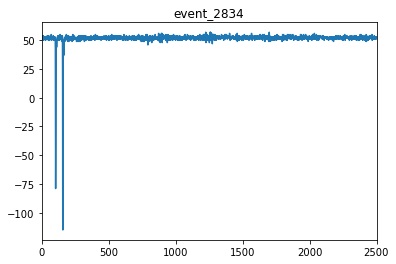

In [10]:
import random
plot_figure(column=random.choice(best), limits=[0,2500])

## Another

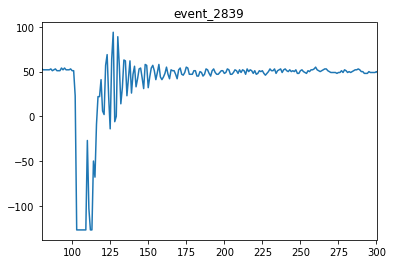

In [11]:
import random
plot_figure(column=random.choice(another), limits=[80,300])

In [12]:
from Analyze.results import Results_Analyze, plots_collection
df_filt, results = Results_Analyze(waveforms=waveforms[best], height=0)



When trying to handle with the contour, a few events seem to have a problem with the contour going outside the waveform limit.
They are ['event_435', 'event_831']. 2 in total.
To solve, please check the arbitrary values for the pulse width.


0:00:02.361741


In [13]:
df_filt.head()

,event_4,event_6,event_23,event_33,event_37,event_41,event_47,event_48,event_50,event_52,...,event_5019,event_5021,event_5022,event_5023,event_5028,event_5029,event_5039,event_5043,event_5053,event_5060
0,54.0,52.0,51.0,52.0,53.0,54.0,50.0,55.0,52.0,53.0,...,51.0,52.0,52.0,53.0,53.0,51.0,52.0,52.0,55.0,53.0
1,52.0,53.0,51.0,52.0,53.0,53.0,51.0,52.0,54.0,54.0,...,53.0,52.0,53.0,51.0,52.0,52.0,53.0,51.0,56.0,52.0
2,49.0,55.0,53.0,50.0,54.0,53.0,52.0,53.0,53.0,52.0,...,52.0,53.0,53.0,53.0,53.0,52.0,53.0,51.0,48.0,54.0
3,52.0,52.0,53.0,52.0,54.0,53.0,52.0,52.0,53.0,51.0,...,52.0,52.0,54.0,53.0,52.0,52.0,52.0,51.0,50.0,50.0
4,54.0,53.0,51.0,50.0,52.0,55.0,51.0,53.0,50.0,53.0,...,52.0,53.0,52.0,52.0,54.0,55.0,52.0,53.0,55.0,52.0


In [14]:
results.head()

,peak_X0,peak_X1,peak_Y0,peak_Y1,integrals_0,integrals_1
event_4,105.0,363.0,127.0,2.0,278.000000,1086.333333
event_6,104.0,508.0,127.0,65.0,233.666667,883.333333
event_23,103.0,176.0,127.0,9.0,509.333333,1045.333333
event_33,103.0,468.0,127.0,70.0,566.333333,856.333333
event_37,104.0,153.0,127.0,53.0,564.666667,907.000000


1021 events


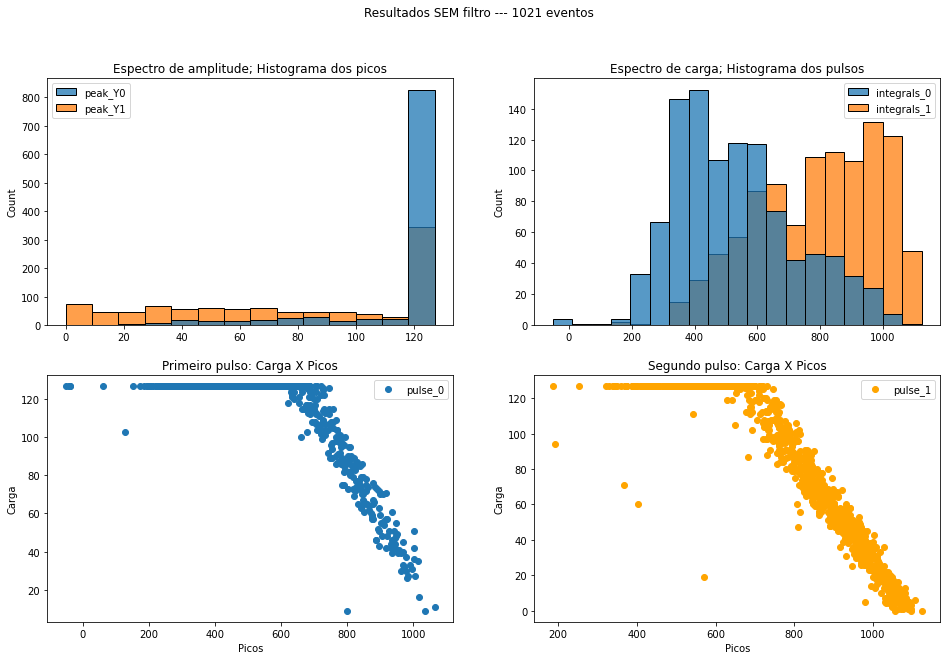

In [15]:
plots_collection(results=results, title=f'Resultados SEM filtro --- {results.shape[0]} eventos')

847 events


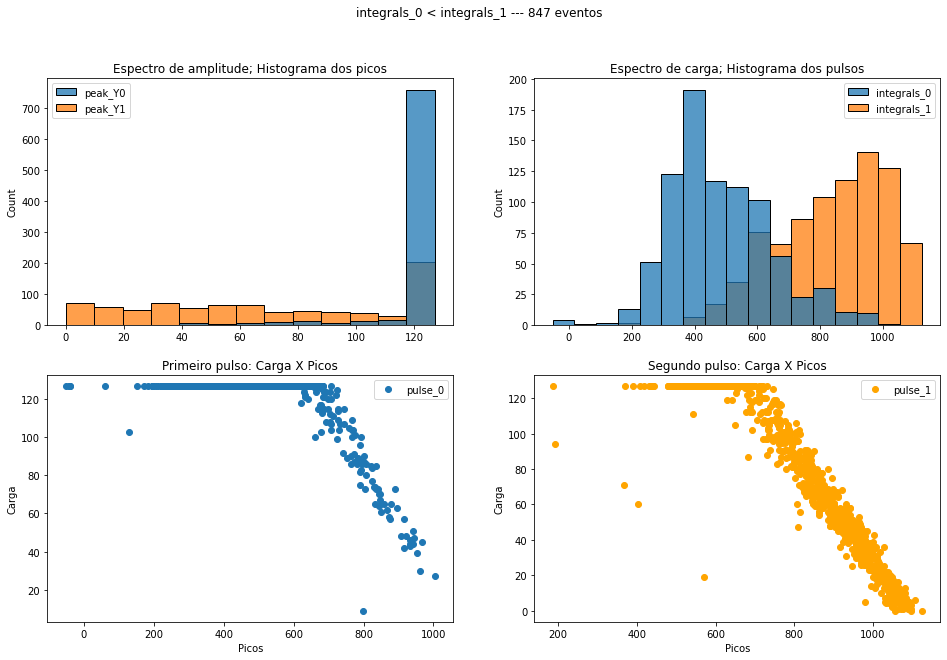

In [16]:
results_filt_integral = results.query("integrals_0 < integrals_1")
plots_collection(results_filt_integral, title=f"integrals_0 < integrals_1 --- {results_filt_integral.shape[0]} eventos")

146 events


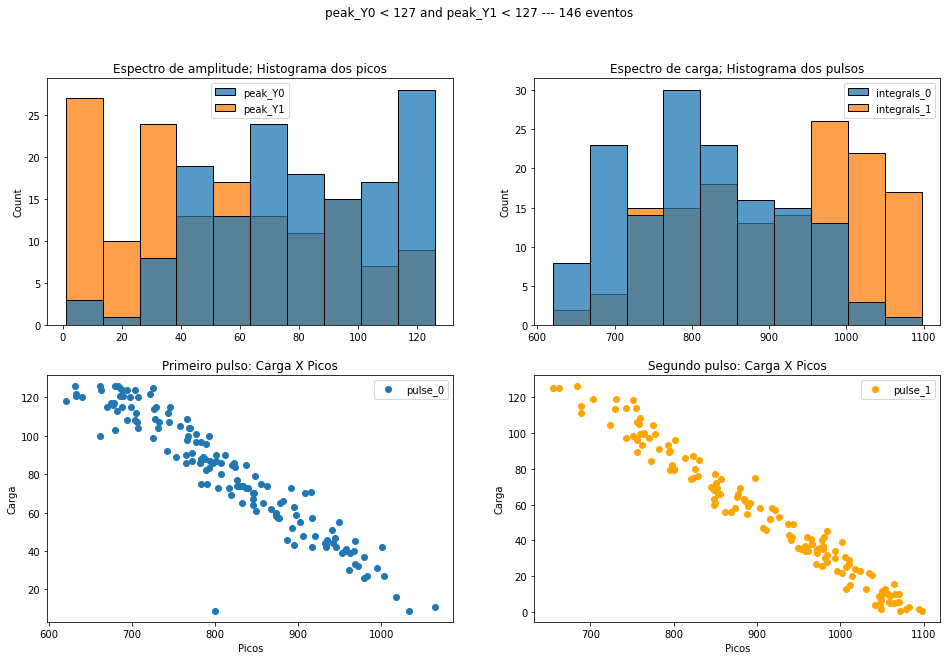

In [17]:
results_filt_peaks = results.query("peak_Y0 < 127 and peak_Y1 < 127")
plots_collection(results_filt_peaks, title=f"peak_Y0 < 127 and peak_Y1 < 127 --- {results_filt_peaks.shape[0]} eventos")

105 events


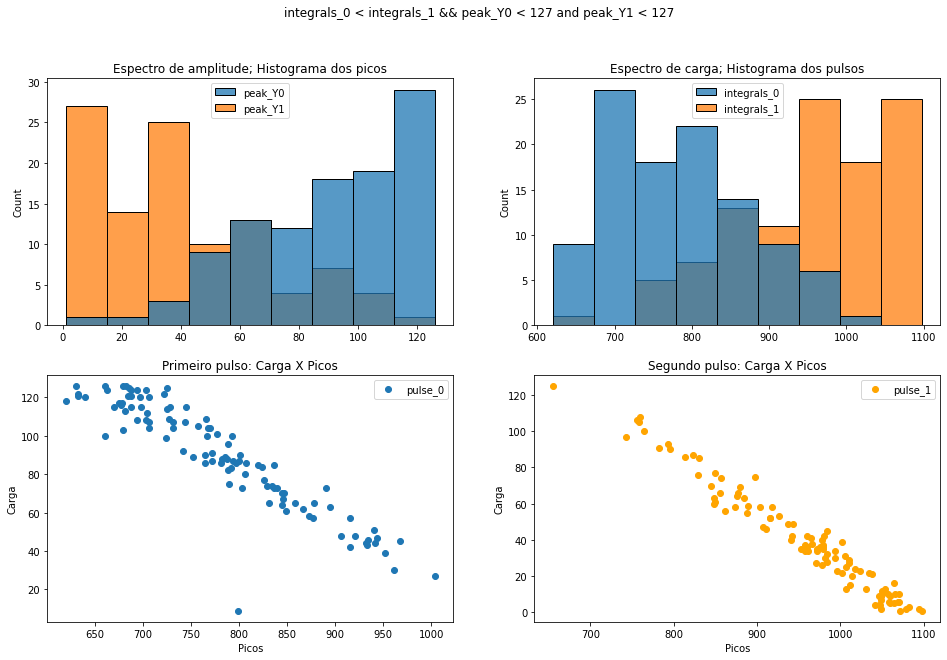

In [18]:
results_filt_peaks_and_integral = results.query("integrals_0 < integrals_1 and peak_Y0 < 127 and peak_Y1 < 127")
plots_collection(results=results_filt_peaks_and_integral, title='integrals_0 < integrals_1 && peak_Y0 < 127 and peak_Y1 < 127')